This is the submission for ACM, ML-Sub yantra by Amogh, 201CS207

In [1]:
import numpy as np

In [2]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from matplotlib import pyplot as plt
from IPython.display import clear_output
import seaborn as sns 
from lazypredict.Supervised import LazyRegressor

F:\Programming\Anaconda\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.model_selection import cross_val_score,KFold
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [4]:
dataset = pd.read_csv("dataset_housingprices.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


In [18]:
dataset

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-122.23,37.88,41,880,129.00,322,126,8.33,452600
1,1,-122.22,37.86,21,7099,1106.00,2401,1138,8.30,358500
2,2,-122.24,37.85,52,1467,190.00,496,177,7.26,352100
3,3,-122.25,37.85,52,1274,235.00,558,219,5.64,341300
4,4,-122.25,37.85,52,1627,280.00,565,259,3.85,342200
...,...,...,...,...,...,...,...,...,...,...
20428,20635,-121.09,39.48,25,1665,374.00,845,330,1.56,78100
20429,20636,-121.21,39.49,18,697,150.00,356,114,2.56,77100
20430,20637,-121.22,39.43,17,2254,485.00,1007,433,1.70,92300
20431,20638,-121.32,39.43,18,1860,409.00,741,349,1.87,84700


In [17]:
dataset.describe()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00
mean,10316.18,-119.57,35.63,28.63,2636.50,537.87,1424.95,499.43,3.87,206864.41
std,5956.70,2.00,2.14,12.59,2185.27,421.39,1133.21,382.30,1.90,115435.67
min,0.00,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,5162.00,-121.80,33.93,18.00,1450.00,296.00,787.00,280.00,2.56,119500.00
50%,10319.00,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.54,179700.00
75%,15473.00,-118.01,37.72,37.00,3143.00,647.00,1722.00,604.00,4.74,264700.00
max,20639.00,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


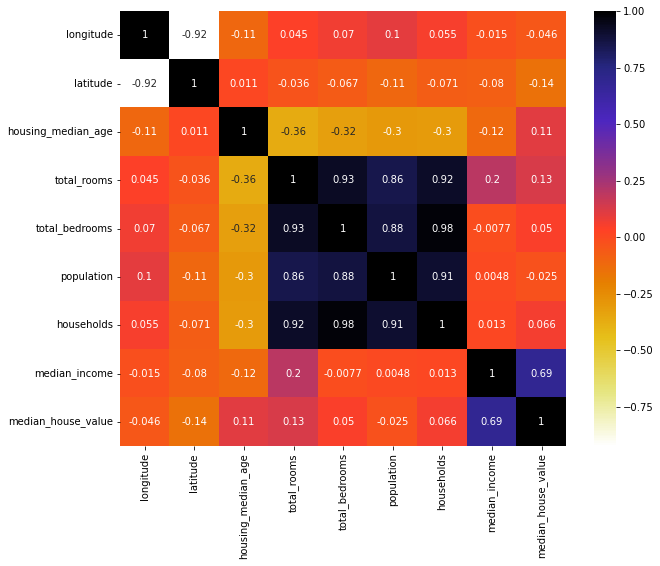

In [7]:
cor = dataset.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor, annot = True , cmap = plt.cm.CMRmap_r)
# keeping features with high positive or negative correlation may not increase the performance of model and can be removed 
# if it results in a better performing model
# we are keeping all of them

In [8]:
np.any(dataset.isnull()) #should be false. if true it means dataset has null values

True

In [20]:
np.all(np.isfinite(dataset)) #should be true. if false it means dataset has infinity in it

True

In [12]:
dataset = dataset.dropna(how='any',axis=0) #dropping rows that have null value in column "total_bedrooms"
dataset = dataset.reset_index()
dataset

In [14]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00
mean,-119.57,35.63,28.63,2636.50,537.87,1424.95,499.43,3.87,206864.41
std,2.00,2.14,12.59,2185.27,421.39,1133.21,382.30,1.90,115435.67
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1450.00,296.00,787.00,280.00,2.56,119500.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.54,179700.00
75%,-118.01,37.72,37.00,3143.00,647.00,1722.00,604.00,4.74,264700.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


### Visualizing Distribution

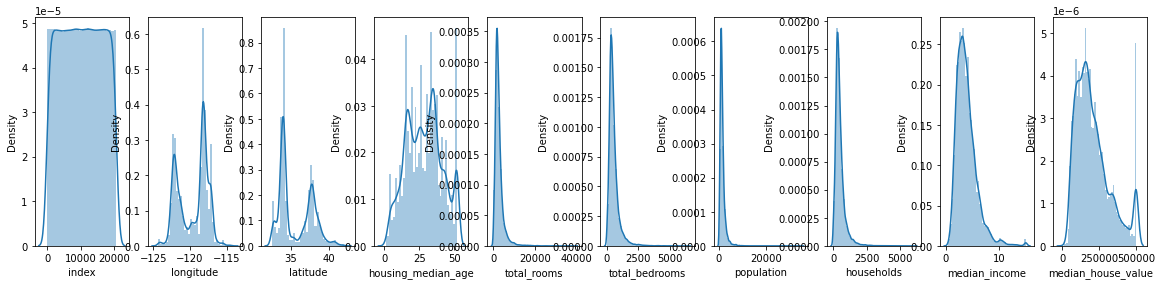

In [22]:
l = dataset.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(dataset[l[i]],kde=True) 

In [23]:
input_set = dataset.loc[:, 'longitude':'median_income']
output_set = dataset.loc[:,'median_house_value']

In [25]:
input_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00
mean,-119.57,35.63,28.63,2636.50,537.87,1424.95,499.43,3.87
std,2.00,2.14,12.59,2185.27,421.39,1133.21,382.30,1.90
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50
25%,-121.80,33.93,18.00,1450.00,296.00,787.00,280.00,2.56
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.54
75%,-118.01,37.72,37.00,3143.00,647.00,1722.00,604.00,4.74
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00


In [66]:
n = 43 # randoom state
x_train,Xtest,y_train,Ytest=train_test_split(input_set,output_set,test_size=0.2,random_state=n)

In [67]:
x_val,x_test,y_val,y_test = train_test_split(Xtest, Ytest, test_size = 0.5, random_state = n)

In [68]:
x_train = x_train.reset_index(drop = True)
x_val = x_val.reset_index(drop = True)
x_test = x_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_val = y_val.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)
print(x_train.shape, x_val.shape, x_test.shape)

(16346, 8) (2043, 8) (2044, 8)


### Using Robust Scaler

In [115]:
scaler=RobustScaler().fit(x_train)
x_train=scaler.transform(x_train)
x_val = scaler.transform(x_val)
x_test=scaler.transform(x_test)
pd.DataFrame(x_train).describe()

,0,1,2,3,4,5,6,7
count,16346.00,16346.00,16346.00,16346.00,16346.00,16346.00,16346.00,16346.00
mean,-0.28,0.37,-0.01,0.30,0.29,0.28,0.28,0.15
std,0.53,0.56,0.66,1.29,1.20,1.19,1.17,0.87
min,-1.53,-0.46,-1.47,-1.26,-1.23,-1.24,-1.25,-1.39
25%,-0.86,-0.09,-0.58,-0.40,-0.40,-0.40,-0.40,-0.44
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.14,0.91,0.42,0.60,0.60,0.60,0.60,0.56
max,1.07,2.03,1.21,22.09,17.13,29.41,17.46,5.27


In [39]:
#checking performance of different models(unoptimized) using lazy predict

reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(x_train, x_val, y_train, y_val)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [01:35<00:00,  2.28s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.84,0.84,46998.74,0.68
LGBMRegressor,0.83,0.83,47299.39,0.17
HistGradientBoostingRegressor,0.83,0.83,47582.14,0.77
RandomForestRegressor,0.82,0.82,48634.15,6.43
ExtraTreesRegressor,0.80,0.80,51349.31,3.01
BaggingRegressor,0.80,0.80,52165.56,0.65
GradientBoostingRegressor,0.78,0.78,54701.21,1.99
KNeighborsRegressor,0.71,0.71,61982.32,0.19
DecisionTreeRegressor,0.67,0.67,66475.29,0.13


In [44]:
#using polynomial features to see if there is a clear linear relation in the dataset.

pf= PolynomialFeatures(degree=3)
pf.fit(x_train)
xp_train = pf.transform(x_train)
xp_val = pf.transform(x_val)

In [45]:
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(xp_train, xp_val, y_train, y_val)
models

#since linear regression did not perform well it is better to go for decision tree algorithms

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [10:29<00:00, 14.99s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.83,0.84,46472.96,3.97
LGBMRegressor,0.82,0.84,46685.73,1.35
XGBRegressor,0.81,0.83,48419.40,7.04
RandomForestRegressor,0.80,0.81,50240.37,136.43
ExtraTreesRegressor,0.78,0.80,52017.23,42.27
BaggingRegressor,0.77,0.79,52793.47,14.85
GradientBoostingRegressor,0.77,0.79,53634.52,59.15
Ridge,0.69,0.71,62322.23,0.33
KNeighborsRegressor,0.65,0.68,65371.15,1.71


As we can see boosted trees and decision tree regressors are performing better on the dataset

Since there is a lot of data here, training a neural network is feasible. Trying a neural network before going to decision trees

# Trying Neural Network


In [91]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import regularizers
import keras.backend as K
import tensorflow as tf

In [102]:
def root_mean_squared_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 
opt = keras.optimizers.Adam(learning_rate=0.0001)

In [120]:
def nn_model():
    model = Sequential()
    model.add(Dense(128, activation = 'relu', input_shape = (8,)))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(128, activation = 'relu', kernel_regularizer=regularizers.l1(0.0005)))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(1, activation = 'relu'))
    return model

nn = nn_model()
nn.compile(optimizer=opt, loss=root_mean_squared_loss)
nn.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_61 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_62 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_63 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_64 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_65 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_66 (Dense)             (None, 1)               

In [121]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")        
        plt.legend()
        plt.show();     
plot_losses = PlotLosses()

In [122]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=60, mode='auto', restore_best_weights=True)

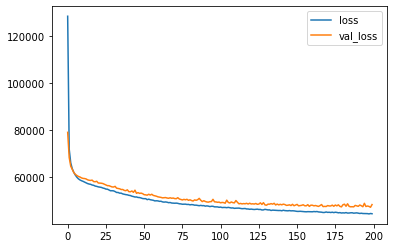

3270/3270 [==============================] - 2s 584us/step - loss: 44374.4883 - val_loss: 48269.1719


In [123]:
nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, batch_size = 5, callbacks = [early_stopping, plot_losses], shuffle=True)

In [144]:
from sklearn import metrics
prediction = nn.predict(x_test)
print('Test Rmse Error:', np.sqrt(metrics.mean_squared_error(prediction, y_test)))

# with enough optimization a neural network could beat other models but moving on...

# using Standard scaler and training for 400 epochs resulted in a RMSE of around 48,000 for neural network.

Test Rmse Error: 53108.30662220843


### Final RMSE for neural network = 48000


# Trying Random Forest and XGB Regressors

In [131]:
def cv_comparison(models, X, y, cv):
    cv_accuracies = pd.DataFrame()
    maes = []
    rmses = []
    for model in models:
        mae = -np.round(cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv), 4)
        maes.append(mae)
        mae_avg = round(mae.mean(), 4)
        
        rmse = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv))
        rmses.append(rmse)
        rmse_avg = round(rmse.mean(), 4)
 
        cv_accuracies[str(model)] = [mae_avg, rmse_avg]
    cv_accuracies.index = ['Mean Absolute Error', 'Root Mean Squared Error']
    return cv_accuracies, maes, rmses

In [132]:
rf = RandomForestRegressor(random_state=n)
xgb = XGBRegressor(random_state=n)
lgbm = LGBMRegressor(random_state = n)

models = [lgbm, rf, xgb]

comp, maes, rmses= cv_comparison(models,x_train, y_train, 4)

In [135]:
comp# comparing lgbm, random forest and xgbr

,LGBMRegressor(random_state=43),RandomForestRegressor(random_state=43),"XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,\n colsample_bynode=None, colsample_bytree=None,\n enable_categorical=False, gamma=None, gpu_id=None,\n importance_type=None, interaction_constraints=None,\n learning_rate=None, max_delta_step=None, max_depth=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=100, n_jobs=None, num_parallel_tree=None,\n predictor=None, random_state=43, reg_alpha=None, reg_lambda=None,\n scale_pos_weight=None, subsample=None, tree_method=None,\n validate_parameters=None, verbosity=None)"
Mean Absolute Error,32380.60,32850.23,32417.59
Root Mean Squared Error,48134.92,50194.97,48647.67


# Trying XGBR

In [136]:
#choosing XGB regressor over Lgbm as it is easier to work with

xgb_n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]
xgb_max_depth = [int(x) for x in np.linspace(2, 20, 10)]
xgb_min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]
xgb_tree_method = ['auto', 'exact', 'approx', 'hist', 'gpu_hist']
xgb_eta = [x for x in np.linspace(0.1, 0.6, 6)]
xgb_gamma = [int(x) for x in np.linspace(0, 0.5, 6)]
xgb_objective = ['reg:squarederror', 'reg:squaredlogerror']
xgb_grid = {'n_estimators': xgb_n_estimators,
            'max_depth': xgb_max_depth,
            'min_child_weight': xgb_min_child_weight,
            'tree_method': xgb_tree_method,
            'eta': xgb_eta,
            'gamma': xgb_gamma,
            'objective': xgb_objective}

In [138]:
from sklearn.model_selection import RandomizedSearchCV
xgb_base = XGBRegressor()
xgb_random = RandomizedSearchCV(estimator = xgb_base, param_distributions = xgb_grid, 
                                n_iter = 200, cv = 3, verbose = 2, 
                                random_state = n, n_jobs = -1)
xgb_random.fit(x_train, y_train)
xgb_random.best_params_

# Not necessary to give these many parameters for optimization leading to high time usage but i did not want to cancel once 
# started. A lesson for the future. Has no GPU optimization

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 21.9min finished


{'tree_method': 'exact',
 'objective': 'reg:squarederror',
 'n_estimators': 1400,
 'min_child_weight': 2,
 'max_depth': 4,
 'gamma': 0,
 'eta': 0.1}

In [139]:
xgb_final = XGBRegressor(tree_method = 'exact',
                         objective = 'reg:squarederror',
                         n_estimators = 1400,
                         min_child_weight = 2,
                         max_depth = 4,
                         gamma = 0,
                         eta = 0.1,
                         random_state = n)

In [140]:
xgb_final.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=4, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=1400, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=43,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [143]:
prediction = xgb_final.predict(x_test)
print('Test Rmse Error:', np.sqrt(metrics.mean_squared_error(prediction, y_test)))

Test Rmse Error: 46580.77453450167


In [166]:
prediction = xgb_final.predict(x_val)
print('Test Rmse Error:', np.sqrt(metrics.mean_squared_error(prediction, y_val)))
#validation has not been used here model was optimized by cross validation so just checking the RMSE here

Test Rmse Error: 46094.03853273475


### Final XGBR RMSE = 46,580

# Trying other models

### Extra Trees Regression

In [145]:
rf = ExtraTreesRegressor(n_estimators= 5000,
min_samples_split= 3,  max_features= 'auto',
max_depth= 400, random_state=43, verbose = 1)
rf.fit(x_train, y_train)
prediction = rf.predict(x_test)
print('Test Rmse Error:', np.sqrt(metrics.mean_squared_error(prediction, y_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test Rmse Error: 52877.115720124835


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:    2.6s finished


## Catboost Regressor

In [148]:
rf = CatBoostRegressor(loss_function='RMSE',
    iterations = 3000,random_seed=43)
rf.fit(x_train, y_train, eval_set=(x_val, y_val),verbose=1,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.040398
0:	learn: 112925.9436394	test: 113741.0723611	best: 113741.0723611 (0)	total: 5.01ms	remaining: 15s
1:	learn: 110777.9780829	test: 111600.0448932	best: 111600.0448932 (1)	total: 8.24ms	remaining: 12.4s
2:	learn: 108531.9680329	test: 109399.9002830	best: 109399.9002830 (2)	total: 11.3ms	remaining: 11.3s
3:	learn: 106492.7162392	test: 107271.6838180	best: 107271.6838180 (3)	total: 14ms	remaining: 10.5s
4:	learn: 104612.9162530	test: 105337.9213379	best: 105337.9213379 (4)	total: 16.5ms	remaining: 9.89s
5:	learn: 102795.3363140	test: 103511.2659035	best: 103511.2659035 (5)	total: 19ms	remaining: 9.48s
6:	learn: 101070.7128743	test: 101808.0405953	best: 101808.0405953 (6)	total: 21.2ms	remaining: 9.08s
7:	learn: 99267.2470737	test: 99970.3742836	best: 99970.3742836 (7)	total: 23.7ms	remaining: 8.87s
8:	learn: 97674.5459837	test: 98393.3451210	best: 98393.3451210 (8)	total: 26.1ms	remaining: 8.66s
9:	learn: 96241.7910593	test: 96957.9324426	best: 96957.9324426 

152:	learn: 55222.4258501	test: 56715.1880357	best: 56715.1880357 (152)	total: 338ms	remaining: 6.28s
153:	learn: 55156.0620713	test: 56662.5711381	best: 56662.5711381 (153)	total: 340ms	remaining: 6.28s
154:	learn: 55115.0473373	test: 56625.2092442	best: 56625.2092442 (154)	total: 342ms	remaining: 6.28s
155:	learn: 55001.6721884	test: 56528.1728319	best: 56528.1728319 (155)	total: 344ms	remaining: 6.28s
156:	learn: 54951.7022115	test: 56470.0949507	best: 56470.0949507 (156)	total: 347ms	remaining: 6.28s
157:	learn: 54913.2892213	test: 56431.4333507	best: 56431.4333507 (157)	total: 349ms	remaining: 6.28s
158:	learn: 54866.7541893	test: 56386.6467439	best: 56386.6467439 (158)	total: 352ms	remaining: 6.28s
159:	learn: 54783.5810380	test: 56302.1688637	best: 56302.1688637 (159)	total: 355ms	remaining: 6.29s
160:	learn: 54711.9074044	test: 56223.6600142	best: 56223.6600142 (160)	total: 357ms	remaining: 6.3s
161:	learn: 54632.1897404	test: 56171.5155433	best: 56171.5155433 (161)	total: 360m

234:	learn: 51412.7122924	test: 53388.1593698	best: 53388.1593698 (234)	total: 516ms	remaining: 6.07s
235:	learn: 51357.8307133	test: 53348.7252069	best: 53348.7252069 (235)	total: 519ms	remaining: 6.07s
236:	learn: 51312.6184133	test: 53313.4239310	best: 53313.4239310 (236)	total: 521ms	remaining: 6.07s
237:	learn: 51273.8052642	test: 53297.0420596	best: 53297.0420596 (237)	total: 523ms	remaining: 6.07s
238:	learn: 51249.4517872	test: 53273.4730429	best: 53273.4730429 (238)	total: 525ms	remaining: 6.07s
239:	learn: 51171.8813316	test: 53202.1503408	best: 53202.1503408 (239)	total: 528ms	remaining: 6.07s
240:	learn: 51134.9237370	test: 53176.9147491	best: 53176.9147491 (240)	total: 530ms	remaining: 6.07s
241:	learn: 51055.5741496	test: 53103.8703986	best: 53103.8703986 (241)	total: 532ms	remaining: 6.07s
242:	learn: 51014.1033573	test: 53076.2560546	best: 53076.2560546 (242)	total: 534ms	remaining: 6.06s
243:	learn: 50950.8179680	test: 52999.7038891	best: 52999.7038891 (243)	total: 537

317:	learn: 48514.7113749	test: 51150.0957787	best: 51150.0957787 (317)	total: 693ms	remaining: 5.84s
318:	learn: 48483.8631867	test: 51112.3845417	best: 51112.3845417 (318)	total: 695ms	remaining: 5.84s
319:	learn: 48456.1080753	test: 51107.2033088	best: 51107.2033088 (319)	total: 697ms	remaining: 5.84s
320:	learn: 48434.3780350	test: 51091.9892195	best: 51091.9892195 (320)	total: 700ms	remaining: 5.84s
321:	learn: 48414.2170370	test: 51072.9705963	best: 51072.9705963 (321)	total: 702ms	remaining: 5.84s
322:	learn: 48385.0567306	test: 51064.9702157	best: 51064.9702157 (322)	total: 704ms	remaining: 5.84s
323:	learn: 48365.9738510	test: 51047.0296143	best: 51047.0296143 (323)	total: 706ms	remaining: 5.83s
324:	learn: 48342.8147705	test: 51034.9213517	best: 51034.9213517 (324)	total: 708ms	remaining: 5.83s
325:	learn: 48323.7941203	test: 51018.5010394	best: 51018.5010394 (325)	total: 710ms	remaining: 5.83s
326:	learn: 48292.3233858	test: 50995.8585904	best: 50995.8585904 (326)	total: 713

402:	learn: 46629.2486740	test: 49853.0439619	best: 49853.0439619 (402)	total: 871ms	remaining: 5.61s
403:	learn: 46606.3876388	test: 49832.5492645	best: 49832.5492645 (403)	total: 873ms	remaining: 5.61s
404:	learn: 46586.2102481	test: 49811.6620247	best: 49811.6620247 (404)	total: 875ms	remaining: 5.61s
405:	learn: 46552.2850753	test: 49771.3391742	best: 49771.3391742 (405)	total: 878ms	remaining: 5.61s
406:	learn: 46528.1602713	test: 49745.8675843	best: 49745.8675843 (406)	total: 880ms	remaining: 5.61s
407:	learn: 46512.9290213	test: 49737.8190358	best: 49737.8190358 (407)	total: 882ms	remaining: 5.6s
408:	learn: 46491.7013184	test: 49724.4755995	best: 49724.4755995 (408)	total: 884ms	remaining: 5.6s
409:	learn: 46477.2392458	test: 49720.2460630	best: 49720.2460630 (409)	total: 886ms	remaining: 5.6s
410:	learn: 46463.8216673	test: 49716.7168219	best: 49716.7168219 (410)	total: 889ms	remaining: 5.6s
411:	learn: 46443.1704653	test: 49707.2665384	best: 49707.2665384 (411)	total: 891ms	r

529:	learn: 44538.0582554	test: 48577.4618506	best: 48577.4618506 (529)	total: 1.22s	remaining: 5.7s
530:	learn: 44524.5398270	test: 48571.7393294	best: 48571.7393294 (530)	total: 1.22s	remaining: 5.69s
531:	learn: 44507.4812119	test: 48551.9329693	best: 48551.9329693 (531)	total: 1.23s	remaining: 5.69s
532:	learn: 44493.3415564	test: 48542.0056155	best: 48542.0056155 (532)	total: 1.23s	remaining: 5.69s
533:	learn: 44479.9434545	test: 48537.0997605	best: 48537.0997605 (533)	total: 1.23s	remaining: 5.68s
534:	learn: 44470.5999821	test: 48534.4640891	best: 48534.4640891 (534)	total: 1.23s	remaining: 5.68s
535:	learn: 44465.0143909	test: 48531.0587615	best: 48531.0587615 (535)	total: 1.24s	remaining: 5.68s
536:	learn: 44451.3850431	test: 48534.0421465	best: 48531.0587615 (535)	total: 1.24s	remaining: 5.68s
537:	learn: 44438.2421638	test: 48526.6493979	best: 48526.6493979 (537)	total: 1.24s	remaining: 5.68s
538:	learn: 44425.4466109	test: 48517.5591496	best: 48517.5591496 (538)	total: 1.24

684:	learn: 42699.1252076	test: 47539.6806437	best: 47539.6806437 (684)	total: 1.57s	remaining: 5.32s
685:	learn: 42691.9994047	test: 47540.6940312	best: 47539.6806437 (684)	total: 1.58s	remaining: 5.32s
686:	learn: 42681.5993212	test: 47539.4216922	best: 47539.4216922 (686)	total: 1.58s	remaining: 5.32s
687:	learn: 42671.8740002	test: 47538.3123597	best: 47538.3123597 (687)	total: 1.58s	remaining: 5.32s
688:	learn: 42660.6041488	test: 47535.5946448	best: 47535.5946448 (688)	total: 1.58s	remaining: 5.31s
689:	learn: 42651.0507774	test: 47531.3636127	best: 47531.3636127 (689)	total: 1.58s	remaining: 5.31s
690:	learn: 42643.9684756	test: 47539.6613625	best: 47531.3636127 (689)	total: 1.59s	remaining: 5.3s
691:	learn: 42635.3046548	test: 47535.5278924	best: 47531.3636127 (689)	total: 1.59s	remaining: 5.3s
692:	learn: 42624.7451392	test: 47536.7772492	best: 47531.3636127 (689)	total: 1.59s	remaining: 5.3s
693:	learn: 42612.9217729	test: 47524.2098684	best: 47524.2098684 (693)	total: 1.59s	

768:	learn: 41859.9179312	test: 47282.7524746	best: 47282.7524746 (768)	total: 1.75s	remaining: 5.08s
769:	learn: 41856.5333447	test: 47278.3529999	best: 47278.3529999 (769)	total: 1.75s	remaining: 5.08s
770:	learn: 41847.6208240	test: 47276.8497807	best: 47276.8497807 (770)	total: 1.76s	remaining: 5.08s
771:	learn: 41838.1887496	test: 47273.1145903	best: 47273.1145903 (771)	total: 1.76s	remaining: 5.08s
772:	learn: 41830.7145202	test: 47266.4710602	best: 47266.4710602 (772)	total: 1.76s	remaining: 5.08s
773:	learn: 41823.3985492	test: 47265.7647213	best: 47265.7647213 (773)	total: 1.76s	remaining: 5.07s
774:	learn: 41816.1466709	test: 47266.1450063	best: 47265.7647213 (773)	total: 1.77s	remaining: 5.07s
775:	learn: 41805.2321484	test: 47262.3666954	best: 47262.3666954 (775)	total: 1.77s	remaining: 5.07s
776:	learn: 41798.8018791	test: 47261.2521508	best: 47261.2521508 (776)	total: 1.77s	remaining: 5.07s
777:	learn: 41791.8796824	test: 47258.0809215	best: 47258.0809215 (777)	total: 1.7

923:	learn: 40518.6978569	test: 46730.0577286	best: 46730.0577286 (923)	total: 2.11s	remaining: 4.74s
924:	learn: 40510.3563252	test: 46725.4468331	best: 46725.4468331 (924)	total: 2.11s	remaining: 4.73s
925:	learn: 40500.6917201	test: 46717.0293361	best: 46717.0293361 (925)	total: 2.11s	remaining: 4.73s
926:	learn: 40492.5797549	test: 46715.7506161	best: 46715.7506161 (926)	total: 2.11s	remaining: 4.73s
927:	learn: 40483.3252130	test: 46718.4218029	best: 46715.7506161 (926)	total: 2.12s	remaining: 4.73s
928:	learn: 40474.8552691	test: 46716.6537929	best: 46715.7506161 (926)	total: 2.12s	remaining: 4.72s
929:	learn: 40463.5750087	test: 46714.5080073	best: 46714.5080073 (929)	total: 2.12s	remaining: 4.72s
930:	learn: 40454.4009397	test: 46710.5337935	best: 46710.5337935 (930)	total: 2.12s	remaining: 4.72s
931:	learn: 40444.1930731	test: 46700.3932179	best: 46700.3932179 (931)	total: 2.13s	remaining: 4.72s
932:	learn: 40437.9685636	test: 46697.1657607	best: 46697.1657607 (932)	total: 2.1

1004:	learn: 39851.7498369	test: 46444.4308333	best: 46444.4308333 (1004)	total: 2.29s	remaining: 4.54s
1005:	learn: 39841.6376932	test: 46434.5458511	best: 46434.5458511 (1005)	total: 2.29s	remaining: 4.53s
1006:	learn: 39831.1614292	test: 46433.7789795	best: 46433.7789795 (1006)	total: 2.29s	remaining: 4.53s
1007:	learn: 39821.1107697	test: 46434.1738757	best: 46433.7789795 (1006)	total: 2.29s	remaining: 4.53s
1008:	learn: 39811.0356132	test: 46430.7038400	best: 46430.7038400 (1008)	total: 2.29s	remaining: 4.53s
1009:	learn: 39805.7158126	test: 46432.0569748	best: 46430.7038400 (1008)	total: 2.3s	remaining: 4.52s
1010:	learn: 39803.3272185	test: 46431.7479422	best: 46430.7038400 (1008)	total: 2.3s	remaining: 4.52s
1011:	learn: 39800.2642951	test: 46430.4284970	best: 46430.4284970 (1011)	total: 2.3s	remaining: 4.52s
1012:	learn: 39788.9197276	test: 46428.7077276	best: 46428.7077276 (1012)	total: 2.3s	remaining: 4.52s
1013:	learn: 39775.9085579	test: 46421.4626946	best: 46421.4626946 (

1089:	learn: 39175.3376078	test: 46209.2241712	best: 46203.1744319 (1087)	total: 2.46s	remaining: 4.32s
1090:	learn: 39163.8463752	test: 46198.5431754	best: 46198.5431754 (1090)	total: 2.46s	remaining: 4.31s
1091:	learn: 39158.2228668	test: 46200.7174083	best: 46198.5431754 (1090)	total: 2.47s	remaining: 4.31s
1092:	learn: 39148.9339630	test: 46200.3717027	best: 46198.5431754 (1090)	total: 2.47s	remaining: 4.31s
1093:	learn: 39139.6132108	test: 46195.1345458	best: 46195.1345458 (1093)	total: 2.47s	remaining: 4.31s
1094:	learn: 39132.0731943	test: 46193.3883311	best: 46193.3883311 (1094)	total: 2.47s	remaining: 4.3s
1095:	learn: 39123.0947783	test: 46190.3071264	best: 46190.3071264 (1095)	total: 2.48s	remaining: 4.3s
1096:	learn: 39119.2798868	test: 46187.4354378	best: 46187.4354378 (1096)	total: 2.48s	remaining: 4.3s
1097:	learn: 39109.9760407	test: 46182.4267027	best: 46182.4267027 (1097)	total: 2.48s	remaining: 4.3s
1098:	learn: 39106.7372504	test: 46182.2334089	best: 46182.2334089 (

1173:	learn: 38592.7220748	test: 46014.9797886	best: 46011.2258553 (1171)	total: 2.64s	remaining: 4.11s
1174:	learn: 38587.7053128	test: 46012.4781640	best: 46011.2258553 (1171)	total: 2.64s	remaining: 4.1s
1175:	learn: 38579.0877361	test: 46012.7546833	best: 46011.2258553 (1171)	total: 2.64s	remaining: 4.1s
1176:	learn: 38573.9671988	test: 46007.5319955	best: 46007.5319955 (1176)	total: 2.65s	remaining: 4.1s
1177:	learn: 38565.5994963	test: 46000.3342640	best: 46000.3342640 (1177)	total: 2.65s	remaining: 4.1s
1178:	learn: 38558.6530454	test: 45996.9766839	best: 45996.9766839 (1178)	total: 2.65s	remaining: 4.09s
1179:	learn: 38553.1416443	test: 45994.4309433	best: 45994.4309433 (1179)	total: 2.65s	remaining: 4.09s
1180:	learn: 38544.0930456	test: 45986.7342117	best: 45986.7342117 (1180)	total: 2.65s	remaining: 4.09s
1181:	learn: 38541.6733228	test: 45985.4277869	best: 45985.4277869 (1181)	total: 2.66s	remaining: 4.09s
1182:	learn: 38537.0528720	test: 45982.9646040	best: 45982.9646040 (

1257:	learn: 38057.1077551	test: 45816.0036163	best: 45816.0036163 (1257)	total: 2.82s	remaining: 3.9s
1258:	learn: 38049.9904593	test: 45820.7001518	best: 45816.0036163 (1257)	total: 2.82s	remaining: 3.9s
1259:	learn: 38044.3593795	test: 45823.0152600	best: 45816.0036163 (1257)	total: 2.82s	remaining: 3.9s
1260:	learn: 38035.5259401	test: 45817.6414674	best: 45816.0036163 (1257)	total: 2.82s	remaining: 3.9s
1261:	learn: 38029.2071494	test: 45817.3288198	best: 45816.0036163 (1257)	total: 2.83s	remaining: 3.89s
1262:	learn: 38026.0909615	test: 45819.8605894	best: 45816.0036163 (1257)	total: 2.83s	remaining: 3.89s
1263:	learn: 38018.2815808	test: 45814.7713139	best: 45814.7713139 (1263)	total: 2.83s	remaining: 3.89s
1264:	learn: 38009.6124348	test: 45817.8531325	best: 45814.7713139 (1263)	total: 2.83s	remaining: 3.89s
1265:	learn: 38007.0411136	test: 45818.4373779	best: 45814.7713139 (1263)	total: 2.84s	remaining: 3.88s
1266:	learn: 38000.3181624	test: 45813.9756198	best: 45813.9756198 (

1407:	learn: 37138.4554649	test: 45589.5282787	best: 45588.0349856 (1404)	total: 3.17s	remaining: 3.59s
1408:	learn: 37135.1571650	test: 45587.8549100	best: 45587.8549100 (1408)	total: 3.18s	remaining: 3.59s
1409:	learn: 37125.4609086	test: 45582.8384137	best: 45582.8384137 (1409)	total: 3.18s	remaining: 3.58s
1410:	learn: 37118.4431607	test: 45585.5726040	best: 45582.8384137 (1409)	total: 3.18s	remaining: 3.58s
1411:	learn: 37114.0422114	test: 45583.0727498	best: 45582.8384137 (1409)	total: 3.18s	remaining: 3.58s
1412:	learn: 37111.5164012	test: 45584.5726765	best: 45582.8384137 (1409)	total: 3.18s	remaining: 3.58s
1413:	learn: 37106.3610742	test: 45581.3143366	best: 45581.3143366 (1413)	total: 3.19s	remaining: 3.57s
1414:	learn: 37102.2427355	test: 45580.4765106	best: 45580.4765106 (1414)	total: 3.19s	remaining: 3.57s
1415:	learn: 37093.8315828	test: 45572.0727790	best: 45572.0727790 (1415)	total: 3.19s	remaining: 3.57s
1416:	learn: 37086.3250494	test: 45567.8410835	best: 45567.84108

1488:	learn: 36665.3588954	test: 45466.9424611	best: 45461.1363142 (1486)	total: 3.35s	remaining: 3.4s
1489:	learn: 36655.2999975	test: 45464.2243594	best: 45461.1363142 (1486)	total: 3.35s	remaining: 3.4s
1490:	learn: 36646.8972854	test: 45458.9573427	best: 45458.9573427 (1490)	total: 3.35s	remaining: 3.4s
1491:	learn: 36638.9458944	test: 45454.6465700	best: 45454.6465700 (1491)	total: 3.36s	remaining: 3.39s
1492:	learn: 36633.5480748	test: 45452.7831614	best: 45452.7831614 (1492)	total: 3.36s	remaining: 3.39s
1493:	learn: 36628.5410723	test: 45454.2686413	best: 45452.7831614 (1492)	total: 3.36s	remaining: 3.39s
1494:	learn: 36623.7585473	test: 45450.8393366	best: 45450.8393366 (1494)	total: 3.36s	remaining: 3.39s
1495:	learn: 36619.0614663	test: 45451.2353501	best: 45450.8393366 (1494)	total: 3.37s	remaining: 3.38s
1496:	learn: 36612.1655248	test: 45448.9284830	best: 45448.9284830 (1496)	total: 3.37s	remaining: 3.38s
1497:	learn: 36607.9724806	test: 45449.6347683	best: 45448.9284830 

1573:	learn: 36195.2027368	test: 45343.4543425	best: 45343.4543425 (1573)	total: 3.53s	remaining: 3.2s
1574:	learn: 36191.9194407	test: 45337.5937570	best: 45337.5937570 (1574)	total: 3.53s	remaining: 3.19s
1575:	learn: 36188.8834296	test: 45338.4172567	best: 45337.5937570 (1574)	total: 3.53s	remaining: 3.19s
1576:	learn: 36184.7930537	test: 45336.4227723	best: 45336.4227723 (1576)	total: 3.54s	remaining: 3.19s
1577:	learn: 36180.7394621	test: 45337.9720453	best: 45336.4227723 (1576)	total: 3.54s	remaining: 3.19s
1578:	learn: 36174.8595816	test: 45333.2248671	best: 45333.2248671 (1578)	total: 3.54s	remaining: 3.19s
1579:	learn: 36166.4798067	test: 45330.5916978	best: 45330.5916978 (1579)	total: 3.54s	remaining: 3.18s
1580:	learn: 36163.5488619	test: 45331.1572441	best: 45330.5916978 (1579)	total: 3.54s	remaining: 3.18s
1581:	learn: 36157.7687430	test: 45327.4723047	best: 45327.4723047 (1581)	total: 3.55s	remaining: 3.18s
1582:	learn: 36154.8341553	test: 45327.5713987	best: 45327.472304

1658:	learn: 35779.9635471	test: 45208.5803744	best: 45208.5803744 (1658)	total: 3.71s	remaining: 3s
1659:	learn: 35774.9940451	test: 45205.6627242	best: 45205.6627242 (1659)	total: 3.71s	remaining: 3s
1660:	learn: 35773.5750164	test: 45206.6640335	best: 45205.6627242 (1659)	total: 3.71s	remaining: 2.99s
1661:	learn: 35764.7273715	test: 45193.1938250	best: 45193.1938250 (1661)	total: 3.71s	remaining: 2.99s
1662:	learn: 35759.3289673	test: 45200.1879938	best: 45193.1938250 (1661)	total: 3.72s	remaining: 2.99s
1663:	learn: 35753.2701787	test: 45195.8920395	best: 45193.1938250 (1661)	total: 3.72s	remaining: 2.99s
1664:	learn: 35748.9723241	test: 45190.9548422	best: 45190.9548422 (1664)	total: 3.72s	remaining: 2.98s
1665:	learn: 35742.7371089	test: 45188.2885811	best: 45188.2885811 (1665)	total: 3.72s	remaining: 2.98s
1666:	learn: 35739.3416967	test: 45187.5555598	best: 45187.5555598 (1666)	total: 3.73s	remaining: 2.98s
1667:	learn: 35735.1160893	test: 45187.9652247	best: 45187.5555598 (16

1807:	learn: 35080.8627445	test: 45102.2229418	best: 45099.0807406 (1805)	total: 4.08s	remaining: 2.69s
1808:	learn: 35076.8006428	test: 45103.3740149	best: 45099.0807406 (1805)	total: 4.08s	remaining: 2.69s
1809:	learn: 35072.4090185	test: 45102.3019298	best: 45099.0807406 (1805)	total: 4.08s	remaining: 2.69s
1810:	learn: 35065.3839331	test: 45098.0412849	best: 45098.0412849 (1810)	total: 4.09s	remaining: 2.68s
1811:	learn: 35062.4387286	test: 45097.4972935	best: 45097.4972935 (1811)	total: 4.09s	remaining: 2.68s
1812:	learn: 35057.6028379	test: 45094.0925526	best: 45094.0925526 (1812)	total: 4.09s	remaining: 2.68s
1813:	learn: 35054.2660645	test: 45093.1364930	best: 45093.1364930 (1813)	total: 4.09s	remaining: 2.68s
1814:	learn: 35052.4085059	test: 45093.3263689	best: 45093.1364930 (1813)	total: 4.09s	remaining: 2.67s
1815:	learn: 35048.7215459	test: 45090.9821195	best: 45090.9821195 (1815)	total: 4.1s	remaining: 2.67s
1816:	learn: 35046.2296029	test: 45092.0627081	best: 45090.982119

1892:	learn: 34685.3043098	test: 44992.4683213	best: 44992.4683213 (1892)	total: 4.26s	remaining: 2.49s
1893:	learn: 34679.7726748	test: 44988.4892894	best: 44988.4892894 (1893)	total: 4.26s	remaining: 2.49s
1894:	learn: 34675.4259335	test: 44988.6005891	best: 44988.4892894 (1893)	total: 4.26s	remaining: 2.49s
1895:	learn: 34672.2281313	test: 44986.6095933	best: 44986.6095933 (1895)	total: 4.26s	remaining: 2.48s
1896:	learn: 34668.7666710	test: 44985.3279872	best: 44985.3279872 (1896)	total: 4.27s	remaining: 2.48s
1897:	learn: 34662.5428504	test: 44985.6965543	best: 44985.3279872 (1896)	total: 4.27s	remaining: 2.48s
1898:	learn: 34655.8237091	test: 44986.5872615	best: 44985.3279872 (1896)	total: 4.27s	remaining: 2.48s
1899:	learn: 34653.6031319	test: 44985.1616459	best: 44985.1616459 (1899)	total: 4.27s	remaining: 2.47s
1900:	learn: 34646.0807401	test: 44981.7843853	best: 44981.7843853 (1900)	total: 4.28s	remaining: 2.47s
1901:	learn: 34643.1398847	test: 44982.3235701	best: 44981.78438

1974:	learn: 34299.1687275	test: 44935.5322126	best: 44934.8986740 (1973)	total: 4.43s	remaining: 2.3s
1975:	learn: 34296.4855320	test: 44931.6492835	best: 44931.6492835 (1975)	total: 4.44s	remaining: 2.3s
1976:	learn: 34293.3678298	test: 44932.6629367	best: 44931.6492835 (1975)	total: 4.44s	remaining: 2.3s
1977:	learn: 34290.7237429	test: 44932.7790645	best: 44931.6492835 (1975)	total: 4.44s	remaining: 2.29s
1978:	learn: 34284.2410205	test: 44931.6905649	best: 44931.6492835 (1975)	total: 4.44s	remaining: 2.29s
1979:	learn: 34278.8349742	test: 44934.7238190	best: 44931.6492835 (1975)	total: 4.45s	remaining: 2.29s
1980:	learn: 34275.1791050	test: 44932.3737600	best: 44931.6492835 (1975)	total: 4.45s	remaining: 2.29s
1981:	learn: 34270.0592422	test: 44934.0486387	best: 44931.6492835 (1975)	total: 4.45s	remaining: 2.29s
1982:	learn: 34266.4638484	test: 44933.8159743	best: 44931.6492835 (1975)	total: 4.45s	remaining: 2.28s
1983:	learn: 34263.5470862	test: 44933.7406659	best: 44931.6492835 

2059:	learn: 33920.6740996	test: 44885.3715574	best: 44881.8681079 (2055)	total: 4.61s	remaining: 2.1s
2060:	learn: 33910.5349092	test: 44880.1569331	best: 44880.1569331 (2060)	total: 4.62s	remaining: 2.1s
2061:	learn: 33905.8128815	test: 44883.0722262	best: 44880.1569331 (2060)	total: 4.62s	remaining: 2.1s
2062:	learn: 33900.8348891	test: 44881.2217867	best: 44880.1569331 (2060)	total: 4.62s	remaining: 2.1s
2063:	learn: 33897.9708188	test: 44880.7923471	best: 44880.1569331 (2060)	total: 4.62s	remaining: 2.1s
2064:	learn: 33892.3201071	test: 44881.7362606	best: 44880.1569331 (2060)	total: 4.63s	remaining: 2.09s
2065:	learn: 33888.4024466	test: 44882.1000207	best: 44880.1569331 (2060)	total: 4.63s	remaining: 2.09s
2066:	learn: 33885.7764818	test: 44879.7435637	best: 44879.7435637 (2066)	total: 4.63s	remaining: 2.09s
2067:	learn: 33881.7905237	test: 44872.6128966	best: 44872.6128966 (2067)	total: 4.63s	remaining: 2.09s
2068:	learn: 33877.6565022	test: 44871.0801056	best: 44871.0801056 (2

2142:	learn: 33570.4288831	test: 44837.0297891	best: 44832.2153491 (2132)	total: 4.79s	remaining: 1.92s
2143:	learn: 33564.0073257	test: 44837.0050846	best: 44832.2153491 (2132)	total: 4.79s	remaining: 1.91s
2144:	learn: 33561.3557298	test: 44837.7197692	best: 44832.2153491 (2132)	total: 4.79s	remaining: 1.91s
2145:	learn: 33557.0318062	test: 44837.4531423	best: 44832.2153491 (2132)	total: 4.8s	remaining: 1.91s
2146:	learn: 33555.3548404	test: 44837.4774822	best: 44832.2153491 (2132)	total: 4.8s	remaining: 1.91s
2147:	learn: 33550.9635490	test: 44837.7714827	best: 44832.2153491 (2132)	total: 4.8s	remaining: 1.9s
2148:	learn: 33546.8610032	test: 44837.9044043	best: 44832.2153491 (2132)	total: 4.8s	remaining: 1.9s
2149:	learn: 33542.0638469	test: 44835.4688009	best: 44832.2153491 (2132)	total: 4.81s	remaining: 1.9s
2150:	learn: 33538.6334076	test: 44836.8263382	best: 44832.2153491 (2132)	total: 4.81s	remaining: 1.9s
2151:	learn: 33532.7167845	test: 44838.1600504	best: 44832.2153491 (2132

2276:	learn: 33022.7435750	test: 44757.6832197	best: 44748.7071112 (2248)	total: 5.12s	remaining: 1.63s
2277:	learn: 33019.4300532	test: 44756.1336396	best: 44748.7071112 (2248)	total: 5.12s	remaining: 1.62s
2278:	learn: 33016.9499906	test: 44756.3608763	best: 44748.7071112 (2248)	total: 5.12s	remaining: 1.62s
2279:	learn: 33015.5911357	test: 44757.3849733	best: 44748.7071112 (2248)	total: 5.13s	remaining: 1.62s
2280:	learn: 33010.9801330	test: 44755.6909788	best: 44748.7071112 (2248)	total: 5.13s	remaining: 1.62s
2281:	learn: 33008.4409546	test: 44759.2730123	best: 44748.7071112 (2248)	total: 5.13s	remaining: 1.61s
2282:	learn: 33005.0868165	test: 44758.0890287	best: 44748.7071112 (2248)	total: 5.13s	remaining: 1.61s
2283:	learn: 33002.3842527	test: 44755.9707922	best: 44748.7071112 (2248)	total: 5.13s	remaining: 1.61s
2284:	learn: 32997.1694358	test: 44757.5408264	best: 44748.7071112 (2248)	total: 5.14s	remaining: 1.61s
2285:	learn: 32995.0445290	test: 44756.1999032	best: 44748.70711

2360:	learn: 32702.9972217	test: 44727.8928581	best: 44725.9434958 (2351)	total: 5.3s	remaining: 1.43s
2361:	learn: 32695.0964173	test: 44722.7689080	best: 44722.7689080 (2361)	total: 5.3s	remaining: 1.43s
2362:	learn: 32691.9861724	test: 44723.0478214	best: 44722.7689080 (2361)	total: 5.3s	remaining: 1.43s
2363:	learn: 32689.0708075	test: 44723.5992575	best: 44722.7689080 (2361)	total: 5.3s	remaining: 1.43s
2364:	learn: 32681.7480872	test: 44722.7612440	best: 44722.7612440 (2364)	total: 5.3s	remaining: 1.42s
2365:	learn: 32676.2562473	test: 44722.6996639	best: 44722.6996639 (2365)	total: 5.31s	remaining: 1.42s
2366:	learn: 32672.6105430	test: 44723.5235904	best: 44722.6996639 (2365)	total: 5.31s	remaining: 1.42s
2367:	learn: 32668.4282858	test: 44727.1029074	best: 44722.6996639 (2365)	total: 5.31s	remaining: 1.42s
2368:	learn: 32664.5637569	test: 44723.9230541	best: 44722.6996639 (2365)	total: 5.31s	remaining: 1.42s
2369:	learn: 32661.9585621	test: 44727.9263707	best: 44722.6996639 (2

2443:	learn: 32387.5803727	test: 44675.8838023	best: 44673.1067050 (2438)	total: 5.47s	remaining: 1.25s
2444:	learn: 32383.6089628	test: 44672.5269938	best: 44672.5269938 (2444)	total: 5.48s	remaining: 1.24s
2445:	learn: 32379.5017327	test: 44673.6150713	best: 44672.5269938 (2444)	total: 5.48s	remaining: 1.24s
2446:	learn: 32376.9314244	test: 44673.9583574	best: 44672.5269938 (2444)	total: 5.48s	remaining: 1.24s
2447:	learn: 32371.1809398	test: 44674.8356951	best: 44672.5269938 (2444)	total: 5.48s	remaining: 1.24s
2448:	learn: 32365.7142002	test: 44672.6092067	best: 44672.5269938 (2444)	total: 5.49s	remaining: 1.23s
2449:	learn: 32364.1984849	test: 44673.5230662	best: 44672.5269938 (2444)	total: 5.49s	remaining: 1.23s
2450:	learn: 32362.2059193	test: 44675.0534577	best: 44672.5269938 (2444)	total: 5.49s	remaining: 1.23s
2451:	learn: 32359.5237820	test: 44673.7302128	best: 44672.5269938 (2444)	total: 5.49s	remaining: 1.23s
2452:	learn: 32355.4421102	test: 44673.3213278	best: 44672.52699

2527:	learn: 32060.1838185	test: 44645.1340913	best: 44644.1108673 (2499)	total: 5.65s	remaining: 1.05s
2528:	learn: 32055.9283600	test: 44648.7983648	best: 44644.1108673 (2499)	total: 5.65s	remaining: 1.05s
2529:	learn: 32052.1458779	test: 44647.0791577	best: 44644.1108673 (2499)	total: 5.66s	remaining: 1.05s
2530:	learn: 32047.5686543	test: 44647.3119904	best: 44644.1108673 (2499)	total: 5.66s	remaining: 1.05s
2531:	learn: 32043.1655016	test: 44646.5046432	best: 44644.1108673 (2499)	total: 5.66s	remaining: 1.05s
2532:	learn: 32040.5110647	test: 44648.0512511	best: 44644.1108673 (2499)	total: 5.66s	remaining: 1.04s
2533:	learn: 32037.3741617	test: 44648.5240458	best: 44644.1108673 (2499)	total: 5.67s	remaining: 1.04s
2534:	learn: 32034.1941660	test: 44649.6386753	best: 44644.1108673 (2499)	total: 5.67s	remaining: 1.04s
2535:	learn: 32029.3987884	test: 44648.9813270	best: 44644.1108673 (2499)	total: 5.67s	remaining: 1.04s
2536:	learn: 32027.0009688	test: 44648.5983182	best: 44644.11086

2611:	learn: 31741.2608658	test: 44638.9230354	best: 44635.6499738 (2592)	total: 5.83s	remaining: 866ms
2612:	learn: 31739.1346737	test: 44638.2340625	best: 44635.6499738 (2592)	total: 5.83s	remaining: 864ms
2613:	learn: 31737.2209745	test: 44639.4811204	best: 44635.6499738 (2592)	total: 5.83s	remaining: 862ms
2614:	learn: 31735.2102901	test: 44639.1372658	best: 44635.6499738 (2592)	total: 5.83s	remaining: 862ms
2615:	learn: 31732.6523510	test: 44638.5831370	best: 44635.6499738 (2592)	total: 5.84s	remaining: 857ms
2616:	learn: 31727.4657050	test: 44635.3209514	best: 44635.3209514 (2616)	total: 5.84s	remaining: 855ms
2617:	learn: 31723.6274944	test: 44637.4101411	best: 44635.3209514 (2616)	total: 5.84s	remaining: 853ms
2618:	learn: 31719.1599242	test: 44635.4284893	best: 44635.3209514 (2616)	total: 5.85s	remaining: 851ms
2619:	learn: 31716.1404631	test: 44635.5597864	best: 44635.3209514 (2616)	total: 5.88s	remaining: 854ms
2620:	learn: 31711.7232685	test: 44635.3724644	best: 44635.32095

2697:	learn: 31428.5533314	test: 44609.4454309	best: 44601.1148216 (2694)	total: 6.22s	remaining: 697ms
2698:	learn: 31424.9384098	test: 44608.6119188	best: 44601.1148216 (2694)	total: 6.23s	remaining: 695ms
2699:	learn: 31420.7447775	test: 44607.9801550	best: 44601.1148216 (2694)	total: 6.23s	remaining: 692ms
2700:	learn: 31411.4483187	test: 44601.2346597	best: 44601.1148216 (2694)	total: 6.23s	remaining: 690ms
2701:	learn: 31409.0928312	test: 44601.6481259	best: 44601.1148216 (2694)	total: 6.23s	remaining: 688ms
2702:	learn: 31404.8687415	test: 44602.6434668	best: 44601.1148216 (2694)	total: 6.24s	remaining: 686ms
2703:	learn: 31402.8145328	test: 44604.6757780	best: 44601.1148216 (2694)	total: 6.24s	remaining: 683ms
2704:	learn: 31400.2833315	test: 44605.1535252	best: 44601.1148216 (2694)	total: 6.24s	remaining: 681ms
2705:	learn: 31395.7997243	test: 44605.4405848	best: 44601.1148216 (2694)	total: 6.24s	remaining: 679ms
2706:	learn: 31392.9341220	test: 44606.3162610	best: 44601.11482

2845:	learn: 30899.4069417	test: 44530.5794190	best: 44529.8595629 (2844)	total: 6.58s	remaining: 356ms
2846:	learn: 30897.8871748	test: 44530.0248347	best: 44529.8595629 (2844)	total: 6.58s	remaining: 354ms
2847:	learn: 30896.9336691	test: 44528.0251888	best: 44528.0251888 (2847)	total: 6.58s	remaining: 351ms
2848:	learn: 30893.4023409	test: 44528.7887989	best: 44528.0251888 (2847)	total: 6.58s	remaining: 349ms
2849:	learn: 30890.3111492	test: 44526.4224127	best: 44526.4224127 (2849)	total: 6.58s	remaining: 347ms
2850:	learn: 30888.7915351	test: 44526.6778851	best: 44526.4224127 (2849)	total: 6.6s	remaining: 345ms
2851:	learn: 30887.5649291	test: 44527.0804281	best: 44526.4224127 (2849)	total: 6.6s	remaining: 343ms
2852:	learn: 30885.9528503	test: 44527.3919146	best: 44526.4224127 (2849)	total: 6.6s	remaining: 340ms
2853:	learn: 30884.0332531	test: 44527.5780130	best: 44526.4224127 (2849)	total: 6.6s	remaining: 338ms
2854:	learn: 30880.8098465	test: 44527.0576358	best: 44526.4224127 (

2926:	learn: 30638.3774981	test: 44487.4265655	best: 44485.4856425 (2914)	total: 6.75s	remaining: 169ms
2927:	learn: 30633.6243611	test: 44487.1421035	best: 44485.4856425 (2914)	total: 6.76s	remaining: 166ms
2928:	learn: 30629.6216766	test: 44486.6332482	best: 44485.4856425 (2914)	total: 6.76s	remaining: 164ms
2929:	learn: 30625.9518076	test: 44488.1382573	best: 44485.4856425 (2914)	total: 6.76s	remaining: 162ms
2930:	learn: 30622.2458560	test: 44485.7207650	best: 44485.4856425 (2914)	total: 6.76s	remaining: 159ms
2931:	learn: 30617.8274313	test: 44482.7213906	best: 44482.7213906 (2931)	total: 6.77s	remaining: 157ms
2932:	learn: 30614.9176684	test: 44480.1560991	best: 44480.1560991 (2932)	total: 6.77s	remaining: 155ms
2933:	learn: 30610.2682692	test: 44480.2456542	best: 44480.1560991 (2932)	total: 6.77s	remaining: 152ms
2934:	learn: 30604.7883609	test: 44479.6137472	best: 44479.6137472 (2934)	total: 6.77s	remaining: 150ms
2935:	learn: 30602.1216281	test: 44480.4131630	best: 44479.61374

In [149]:
prediction = rf.predict(x_test)
print('Test Rmse Error:', np.sqrt(metrics.mean_squared_error(prediction, y_test)))

Test Rmse Error: 45083.25577906027


### Final Catboost RMSE = 45,000


In [162]:
#trying linear regression
polynomial_features= PolynomialFeatures(degree=2)
polynomial_features.fit(x_train, y_train)
x_poly_train = polynomial_features.transform(x_train)
x_poly_val = polynomial_features.transform(x_val)
x_poly_test = polynomial_features.transform(x_test)
lr = LinearRegression(copy_X = True, fit_intercept = False)
lr.fit(x_poly_train, y_train)

LinearRegression(fit_intercept=False)

In [163]:
prediction = lr.predict(x_poly_test)
print('Test Rmse Error:', np.sqrt(metrics.mean_squared_error(prediction, y_test)))

Test Rmse Error: 62593.181537832636


In [164]:
prediction = lr.predict(x_poly_val)
print('Test Rmse Error:', np.sqrt(metrics.mean_squared_error(prediction, y_val)))

Test Rmse Error: 88195.62166972703


As we can see the best performing model was Catboost Regressor with a RMSE of around 45,000. Thus Catboost regressor is selected as the final model. 
# Best: Catboost
# RMSE: 45,000